# Analysis of the Correlation Between Construction Events and Noise Complaints

In [27]:
import csv
import ast
import itertools
import numpy
import sys

csv.field_size_limit(sys.maxsize)

from shapely.geometry import shape, Point
from rtree import index
from datetime import datetime, date, timedelta

complaints = {'Alarms':0, 'Banging/Pounding':0, 'Car/Truck Horn':0, 'Construction Equipment':0,
              'Construction Before/After Hours':0, 'Jack Hammering':0, 'Engine Idling':0}

permiters = {'ALTERATION':0, 'PLUMBING':0, 'EQUIPMENT WORK':0, 'EQUIPMENT':0, 'FOUNDATION':0, 
             'NEW BUILDING':0, 'SIGN':0, 'FULL DEMOLITION':0}

######################### UTILS #########################    
def roundTime(dt=None, roundTo=60):
   """
   Round a datetime object to any time laps in seconds
   :param dt: datetime.datetime object, default now.
   :param roundTo: closest number of seconds to round to, default 1 minute.
   :return: the rounded time.
   """
   if dt == None : dt = datetime.now()
   seconds = (dt - dt.min).seconds
   rounding = (seconds+roundTo/2) // roundTo * roundTo
   return dt + timedelta(0, rounding-seconds, -dt.microsecond)

def filteredCsvToDict(filename, fields, location):
    dict = {}
    with open(filename, 'rb') as fin:
        reader = csv.reader(fin, delimiter=';')
        for row in reader:
            key = row[0]
            new_values = []
            for item in ast.literal_eval(row[1]):
                match = [field for field in fields.keys() if field in item[3]]   
                if match:
                    new_values.append(item)
                    fields[match[0]] += 1
            dict[key] = new_values
    return dict

In [28]:
if __name__ == '__main__':
    permiters_per_region = filteredCsvToDict("../Resources/Permiters_Per_Region.csv", permiters, 3)
    complaints_per_region = filteredCsvToDict("../Resources/Complaints_Per_Region.csv", complaints, 3)

# General Visualization

## Number of Complaints per Category

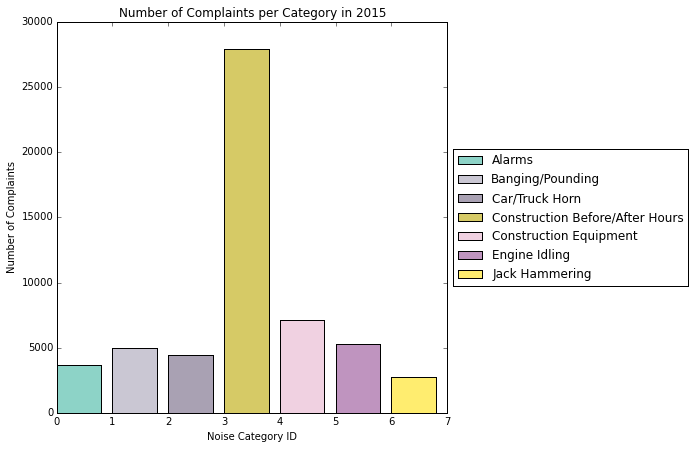

In [29]:
%matplotlib inline

import numpy
import matplotlib
import matplotlib.pyplot as plt

import collections

cmap = plt.get_cmap('Set3')
colors = [cmap(i) for i in numpy.linspace(0, 1, len(complaints))]
complaints = collections.OrderedDict(sorted(complaints.items()))

plt.figure(figsize=(7, 7), dpi=200)
item = 0
for key, value in complaints.iteritems():
    plt.bar(item, value, label=key, color=colors[item])
    item += 1
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))    
plt.xlabel('Noise Category ID')
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints per Category in 2015')

## Number of Complaints per Region

(0, 149)

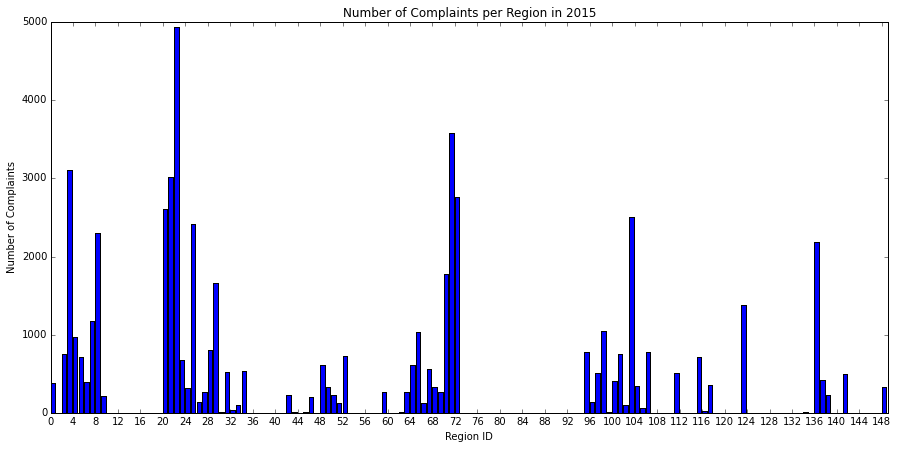

In [38]:
plt.figure(figsize=(15, 7), dpi=200)
item = 0
for key, value in complaints_per_region.iteritems():
    plt.bar(item, len(value), label=int(key)) 
    item += 1
plt.xticks(numpy.arange(0, 149, 4))
plt.xlabel('Region ID')
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints per Region in 2015')
plt.xlim(0, 149)

In [45]:
top_noisy = collections.OrderedDict(sorted(complaints_per_region.items(), key=lambda x:len(x[1]), reverse=True))
top_noisy = itertools.islice(top_noisy.items(), 0, 5)

for key, value in top_noisy:
    print 'Region', key, ':', len(value)

Region 8 : 4939
Region 104 : 3581
Region 130 : 3109
Region 4 : 3014
Region 105 : 2766
